## Microsoft Movie Analysis
#### Sidney Kung
(Add picture of Microsoft brand header)

### Business Problem
Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with exploring what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### Overview
This project analyzes ... using ... method ... using .... data.

In [22]:
# importing the necessary pandas and matplotlib libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import seaborn as sns

### Understanding the Data

The DataFrame was complied by combining four data sets from the websites IMDB and TMDB. Each dataset contained useful information about movies. I cleaned the datasets before merging them and importing them for analysis.

Origin file names:
- imdb.title.basics.csv.gz
- imdb.title.ratings.csv.gz
- tmdb.movies.csv.gz
- tn.movie_budgets.csv.gz

In [2]:
# loading all_movies_df and setting it to the variable all_movies
all_movies = pd.read_csv('all_movies_df.csv')

In [32]:
all_movies.head()

Unnamed: 0 imdb_tconst               primary_title  \
0           0   tt0069049  The Other Side of the Wind   
1           1   tt0112502                     Bigfoot   
2           4   tt0192528               Heaven & Hell   
3           5   tt0249516                  Foodfight!   
4           6   tt0255820           Return to Babylon   

              imdb_orig_title  start_year  runtime_minutes  \
0  The Other Side of the Wind        2018            122.0   
1                     Bigfoot        2017             91.0   
2              Reverse Heaven        2018            104.0   
3                  Foodfight!        2012             91.0   
4           Return to Babylon        2013             75.0   

                    genres  imdb_avg_rating  imdb_numvotes  \
0                    Drama              6.9         4517.0   
1          Horror,Thriller              4.1           32.0   
2                    Drama              4.0           72.0   
3  Action,Animation,Comedy              1.9         8248.0   
4   Biography,Comedy,Drama              5.9          123.0   

          db_genre_ids  ...  original_language               db_orig_title  \
0             [35, 18]  ...                 en  The Other Side of the Wind   
1        [27, 878, 12]  ...                 en                     Bigfoot   
2                 [18]  ...                 en               Heaven & Hell   
3  [16, 28, 35, 10751]  ...                 en                  Foodfight!   
4             [35, 18]  ...                 en           Return to Babylon   

  db_popularity  release_date_x db_vote_avg  db_vote_count  production_budget  \
0         9.800      2018-11-02         7.0             64                NaN   
1         2.813      2012-06-30         2.9             26                NaN   
2         0.600      2018-11-06         7.5              2                NaN   
3         4.705      2013-05-07         2.1             46        $45,000,000   
4         0.877      2013-08-11         7.0              1                NaN   

  domestic_gross  worldwide_gross release_month  
0            NaN              NaN            11  
1            NaN              NaN             6  
2            NaN              NaN            11  
3            0.0          $73,706             5  
4            NaN              NaN             8  

[5 rows x 21 columns]

In [4]:
# all_movies.info()

In [5]:
# all_movies.describe(include='all')

# Analysis

## 1. Average Domestic Gross Each Month
#### (Optimal Release Times During the Year)

In [6]:
# Cleaning the data before making graph

# removing $ from domestic_gross
all_movies['domestic_gross'] = all_movies['domestic_gross'].str.replace(',', '')
all_movies['domestic_gross'] = all_movies['domestic_gross'].str.replace('$', '')

# converting values in domestic_gross to float
all_movies['domestic_gross'] = all_movies['domestic_gross'].apply(lambda x: float(x))

# creating a new column of release dates without year
all_movies['release_month'] = pd.DatetimeIndex(all_movies['release_date_x']).month

In [7]:
#d_gross

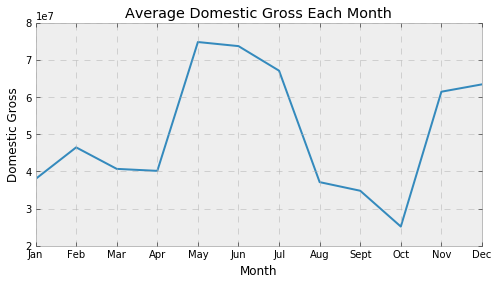

In [31]:
# line graph

# x-axis: sorting dataframe by months and setting that equal to months
all_movies.sort_values(by='release_month', ascending=True)
months = sorted(all_movies['release_month'].unique())
# y-axis: setting the mean of domestic_gross to d_gross
d_gross = all_movies.groupby('release_month')['domestic_gross'].mean()

# creating a line plot
fig, ax = plt.subplots(figsize=(8,4))
months_plot = ax.plot(months, d_gross)

ax.set_xlabel('Month')
ax.set_ylabel('Domestic Gross')
ax.set_title('Average Domestic Gross Each Month')

# setting x-axis labels to match each month
ax.set_xlim(1, 12)
ax.set_xticks((1,2,3,4,5,6,7,8,9,10,11,12))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

# ax.set_yticks((3,4,5,6,7,8))
# ax.set_yticklabels(['4.067798e+07', '4.014231e+07', '7.477903e+07', '6.707287e+07', '3.711666e+07', '3.711666e+07'])

# renaming each axis tick by month name
plt.show()

## 2. Average Return on Investment (ROI) 
- working with production_budget and worldwide_gross
- graph would be a line plot

In [34]:
## cleaning data for production_budget
# removing $ from production_budget
all_movies['production_budget'] = all_movies['production_budget'].str.replace(',', '')
all_movies['production_budget'] = all_movies['production_budget'].str.replace('$', '')
# converting values in production_budget to float
all_movies['production_budget'] = all_movies['production_budget'].apply(lambda x: float(x))

## cleaning data for worldwide_gross
# removing $ from production_budget
all_movies['worldwide_gross'] = all_movies['worldwide_gross'].str.replace(',', '')
all_movies['worldwide_gross'] = all_movies['worldwide_gross'].str.replace('$', '')
# converting values in production_budget to float
all_movies['worldwide_gross'] = all_movies['worldwide_gross'].apply(lambda x: float(x))

In [49]:
# calculating the ROI for each movie by vectorizing the 'worldwide_gross' and 'production_bugdet' columns and creating new column 'roi'

all_movies['roi'] = (all_movies['worldwide_gross'] / all_movies['production_budget']) * 100

In [124]:
#all_movies.count()

In [125]:
#all_movies.describe

(0, 1500)

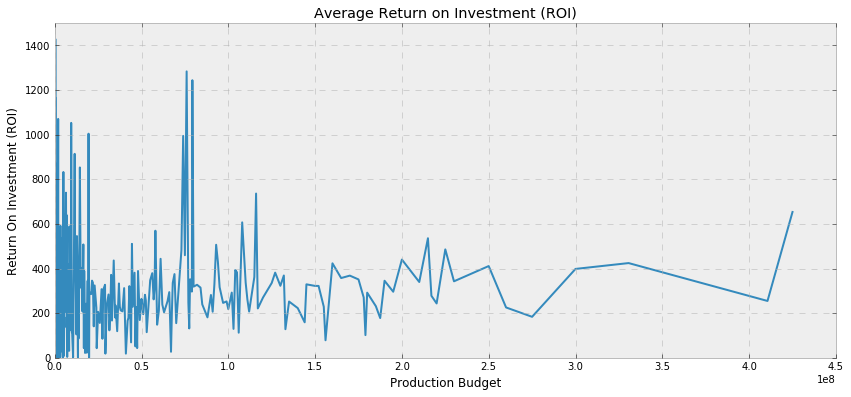

In [123]:
# scatter plot

# y-axis
roi = all_movies.groupby('production_budget')['roi'].mean()
# x-axis
prod_budget = roi.index

# creating a scatter plot
fig, ax = plt.subplots(figsize=(14,6))
roi_plot = ax.plot(prod_budget, roi)

ax.set_xlabel('Production Budget')
ax.set_ylabel('Return On Investment (ROI)')
ax.set_title('Average Return on Investment (ROI)')


ax.set_ylim(0, 1500)



## 3. Average Budget According to Runtime
- working with production_budget and runtime_minutes
- graph would be a bar plot


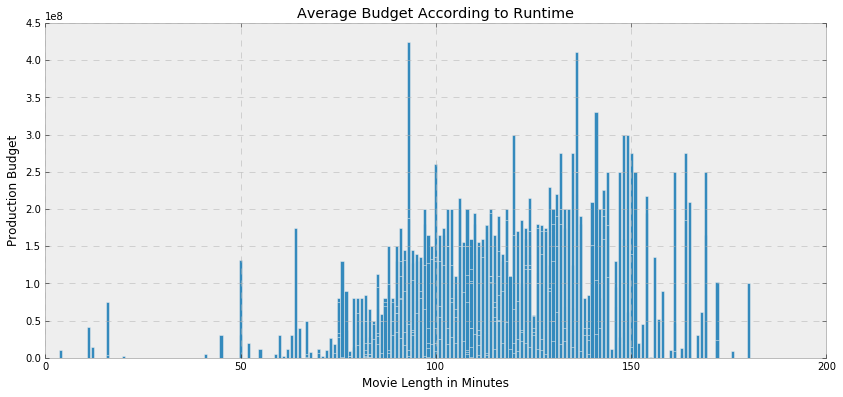

In [130]:
# bar plot

# x-axis
length = all_movies['runtime_minutes']
# y-axis
budget = all_movies['production_budget']

# creating a bar plot
fig, ax = plt.subplots(figsize=(14,6))
roi_plot = ax.bar(length, budget)

ax.set_xlabel('Movie Length in Minutes')
ax.set_ylabel('Production Budget')
ax.set_title('Average Budget According to Runtime')

# ax.set_ylim(0, 1500)

plt.show()

# is this a density plot??

## 4. Average Rating According to Domestic Gross
- working with imdb_avg_rating and domestic_gross
- graph would be a bar plot

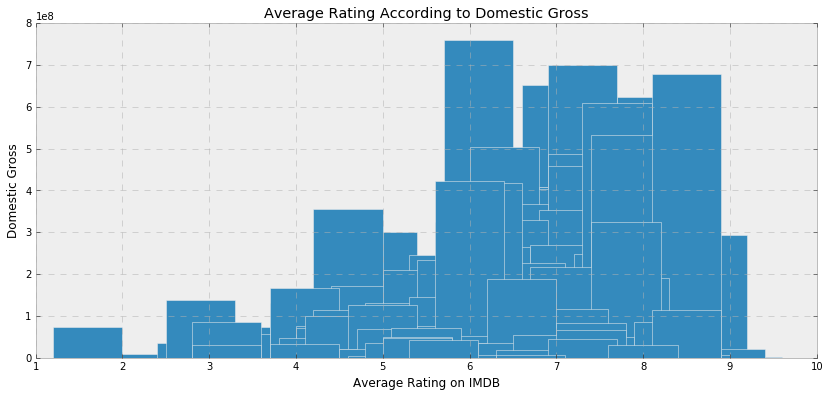

In [131]:
# bar plot

# x-axis
rating = all_movies['imdb_avg_rating']
# y-axis
dom_gross = all_movies['domestic_gross']

# creating a bar plot
fig, ax = plt.subplots(figsize=(14,6))
roi_plot = ax.bar(rating, dom_gross)

ax.set_xlabel('Average Rating on IMDB')
ax.set_ylabel('Domestic Gross')
ax.set_title('Average Rating According to Domestic Gross')

# ax.set_ylim(0, 1500)

plt.show()

## 5. Relationship between genre and rating

## Conclusions

## Next Steps
Further analyses could yield additional insights to further improve operations at AAC:

- Better prediction of animals that are likely to have long stays. This modeling could use already available data, such as breed and intake condition.

- Model need for medical support. This modeling could predict the need for specialized personnel to address animals' medical needs, including neutering, using intake condition and sex data.
- Predicting undesirable outcomes. This modeling could identify animals that are more likely to have undesirable outcomes (e.g. Euthanasia) for targeted medical support or outreach.